# Simple example of the evolutionary optimization framework

This notebook provides a simple example for the use of the evolutionary optimization framework builtin to the library. Under the hood, the implementation of the evolutionary algorithm is powered by `deap` and `pypet` cares about the parallelization and storage of the simulation data for us. 

Here we demonstrate how to fit parameters of a the evaluation function `optimize_me` which simply computes the distance of the parameters to the unit circle and returns this as the `fitness_tuple` that DEAP expects.

In [2]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
try:
    import neurolib
except ImportError:
    import sys
    !{sys.executable} -m pip install neurolib
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [3]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt 
    
try:
    import seaborn
except ImportError:
    import sys
    !{sys.executable} -m pip install seaborn
    import seaborn    
    
import numpy as np
import logging

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [4]:
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu
import neurolib.utils.functions as func

In [5]:
def optimize_me(traj):
    ind = evolution.getIndividualFromTraj(traj)
    logging.info("Hello, I am {}".format(ind.id))
    logging.info("You can also call me {}, or simply ({:.2}, {:.2}).".format(ind.params, ind.x, ind.y))
    
    # let's make a circle
    computation_result = abs((ind.x**2 + ind.y**2) - 2)
    # DEAP wants a tuple as fitness, ALWAYS!
    fitness_tuple = (computation_result ,)
    
    # we also require a dictionary with at least a single result for storing the results in the hdf
    result_dict = {}
    
    return fitness_tuple, result_dict

The evolutionary algorithm tries to find the optimal parameter set that will maximize (or minimize) a certain fitness function. 

This achieved by seeding an initial population of size `POP_INIT_SIZE` that is randomly initiated in the parameter space `parameterSpace`. After simulating the initial population using `evalFunction`, only a subset of the individuals is kept, defined by `POP_SIZE`. 

Members of the remaining population are chosen based on their fitness (using rank selection) to mate and produce `offspring`. These `offspring` have parameters that are drawn from a normal distribution defined by the mean of the parameters between the two parents. Then the `offspring` population is evaluated and the process loops back to START: 

This process is repeated for `NGEN` generations.

In [15]:
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, weightList = [-1.0],
                      POP_INIT_SIZE=400, POP_SIZE = 80, NGEN=50, filename="example-2.0.hdf", algorithm="nsga2")

evolution.run(verbose = False)

MainProcess root INFO     Assuming parameter kind "bound"
MainProcess root INFO     Trajectory Name: results-2022-06-22-12H-44M-53S
MainProcess root INFO     Storing data to: ./data/hdf/example-2.0.hdf
MainProcess root INFO     Trajectory Name: results-2022-06-22-12H-44M-53S
MainProcess root INFO     Number of cores: 10
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/example-2.0.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: nsga2
/Users/cc/miniconda3_x86/envs/neurolib_x86/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/cc/miniconda3_x86/envs/neurolib_x86/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been cr

In [16]:
evolution.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/example-2.0.hdf
MainProcess root INFO     Analyzing trajectory results-2022-06-22-12H-44M-53S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/example-2.0.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2022-06-22-12H-44M-53S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `derived_parameters` in mode `1`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


> Simulation parameters
HDF file storage: ./data/hdf/example-2.0.hdf
Trajectory Name: results-2022-06-22-12H-44M-53S
Duration of evaluating initial population 0:00:04.885326
Duration of evolution 0:01:19.005724
Eval function: <function optimize_me at 0x7fa828eec3b0>
Parameter space: {'x': [-5.0, 5.0], 'y': [-5.0, 5.0]}
> Evolution parameters
Number of generations: 50
Initial population size: 400
Population size: 80
> Evolutionary operators
Mating operator: <function cxSimulatedBinaryBounded at 0x7fa829d92830>
Mating paramter: {'low': [-5.0, -5.0], 'up': [5.0, 5.0], 'eta': 20.0}
Selection operator: <function selNSGA2 at 0x7fa829d92b00>
Selection paramter: {}
Parent selection operator: <function selTournamentDCD at 0x7fa829d9cb00>
Comments: no comments
--- Info summary ---
Valid: 80
Mean score (weighted fitness): -0.017
Parameter distribution (Generation 49):
x: 	 mean: 0.2931,	 std: 1.1819
y: 	 mean: 0.0482,	 std: 0.7170
--------------------
Best 5 individuals:
Printing 5 individuals
In

/Users/cc/Documents/PhD/projects/neurolib/neurolib/optimize/evolution/evolutionaryUtils.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


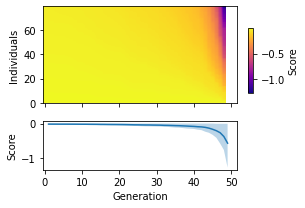

There are 80 valid individuals
Mean score across population: -0.017


MainProcess root INFO     Saving plot to ./data/figures/results-2022-06-22-12H-44M-53S_hist_49.png


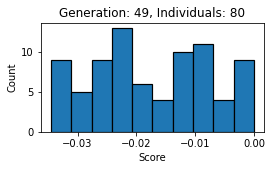

<Figure size 432x288 with 0 Axes>

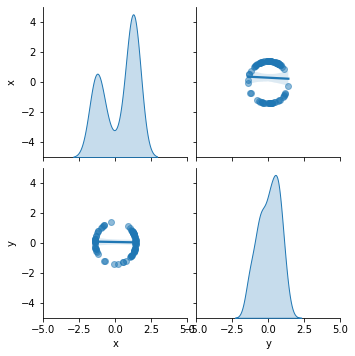

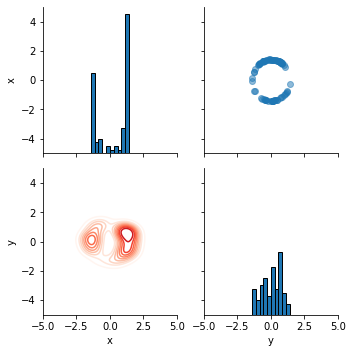

In [17]:
evolution.info(plot=True)

Text(0, 0.5, 'Score')

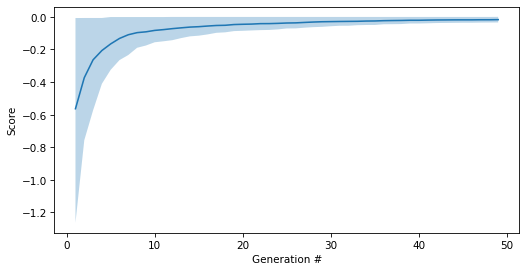

In [18]:
gens, all_scores = evolution.getScoresDuringEvolution(reverse=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=75)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")

## Plot individuals

In [19]:
import pandas as pd
coord_range = 5
background = pd.DataFrame()
i = 0
for x in np.linspace(-coord_range, coord_range, 20):
    for y in np.linspace(-coord_range, coord_range, 20):
        i+=1
        background.loc[i, "x"] = x
        background.loc[i, "y"] = y
background['z'] = abs(background.x**2 + background.y**2 - 2)
background        

,x,y,z
1,-5.0,-5.000000,48.000000
2,-5.0,-4.473684,43.013850
3,-5.0,-3.947368,38.581717
4,-5.0,-3.421053,34.703601
5,-5.0,-2.894737,31.379501
...,...,...,...
396,5.0,2.894737,31.379501
397,5.0,3.421053,34.703601
398,5.0,3.947368,38.581717
399,5.0,4.473684,43.013850


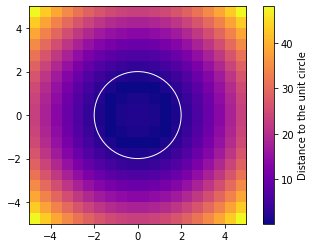

In [20]:
def plot_background():
    plt.imshow(background.pivot_table(values='z', index = 'x', columns='y'), \
               extent = [min(background.x), max(background.x),
                         min(background.y), max(background.y)], origin='lower')
    circle1 = plt.Circle((0, 0), 2, color='w', fill=False)
    plt.gca().add_patch(circle1)
    plt.colorbar(label='Distance to the unit circle')
plot_background()

/Users/cc/Documents/PhD/projects/neurolib/neurolib/optimize/evolution/evolutionaryUtils.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


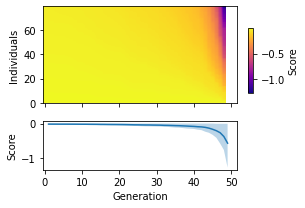

In [22]:
evolution.plotProgress()

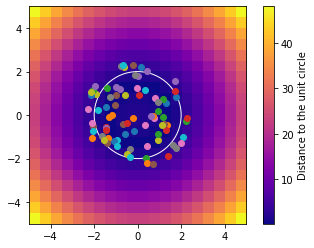

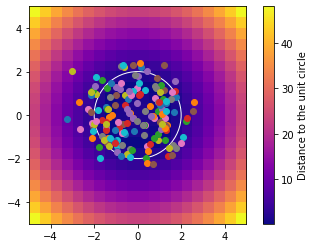

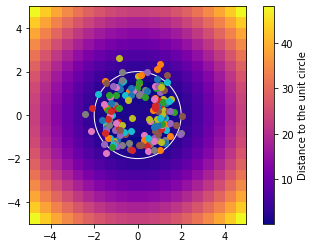

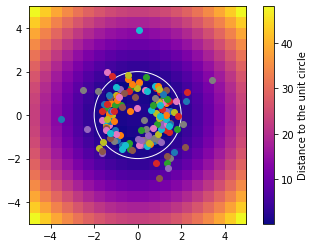

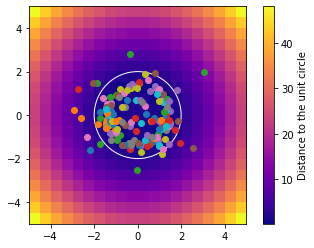

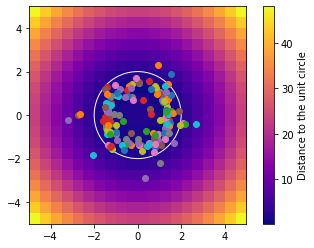

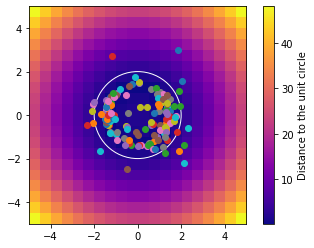

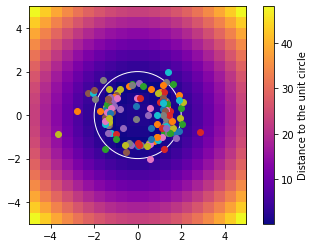

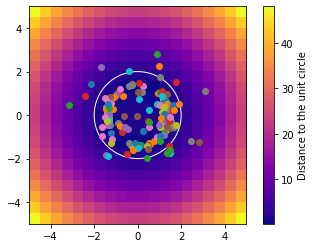

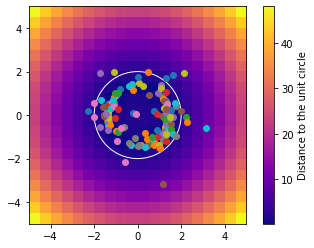

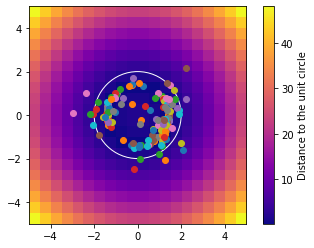

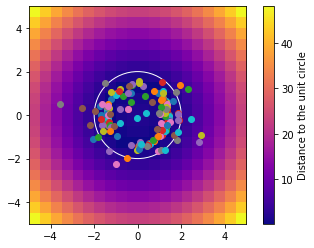

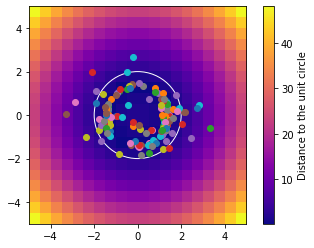

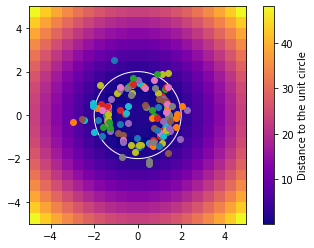

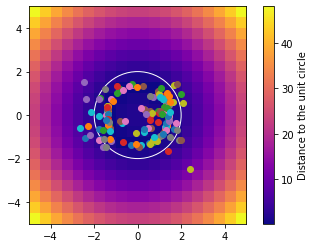

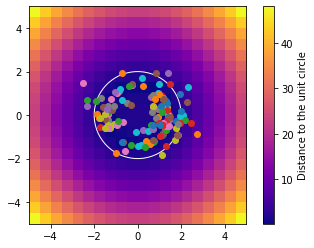

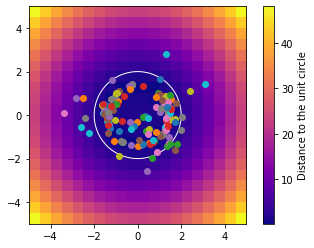

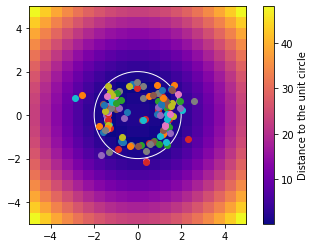

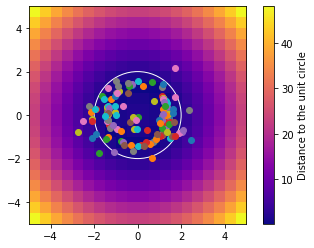

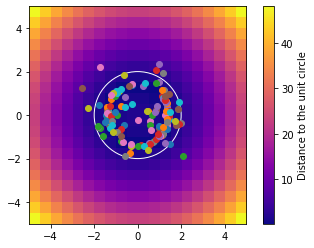

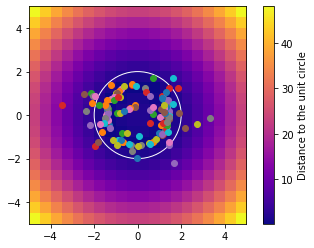

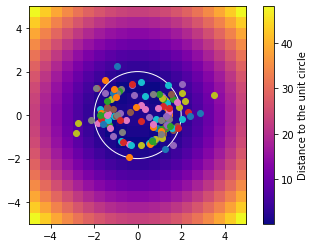

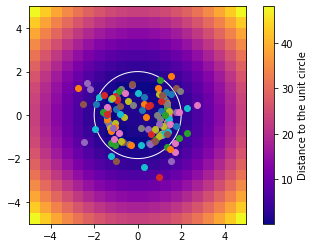

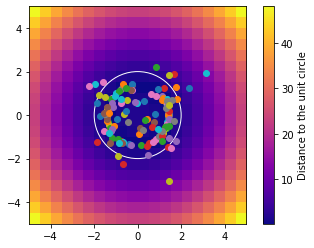

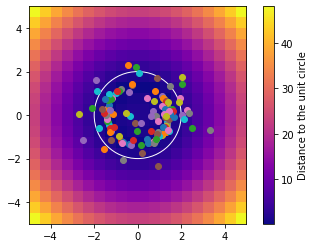

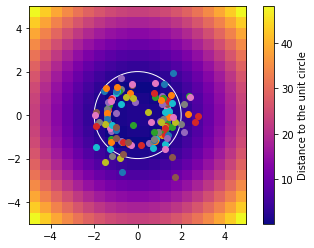

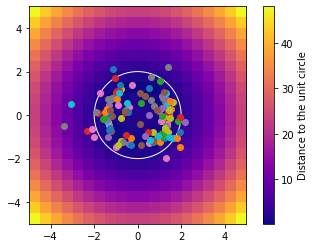

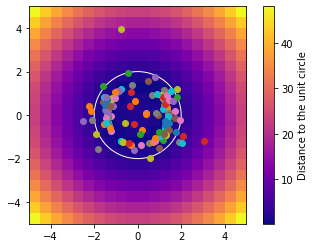

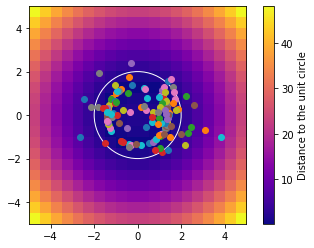

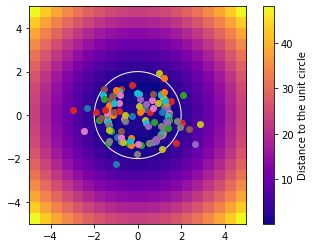

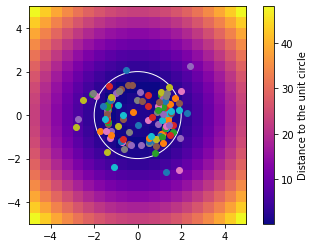

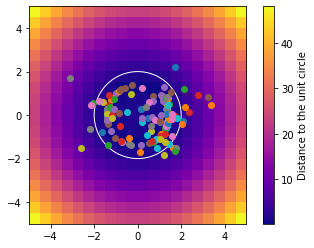

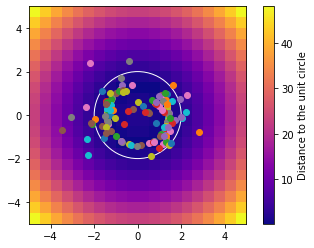

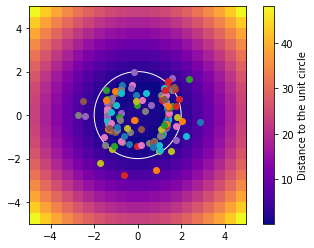

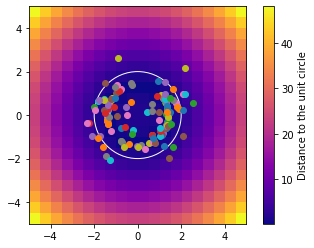

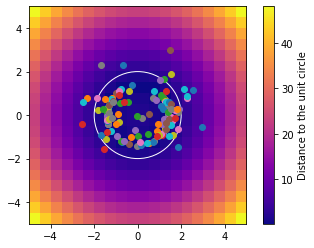

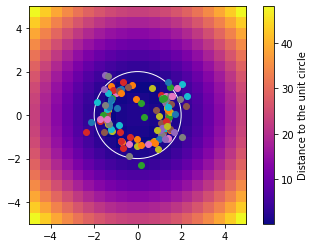

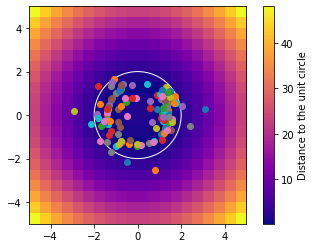

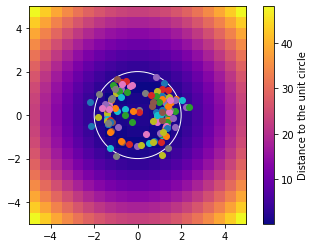

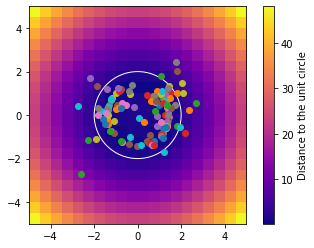

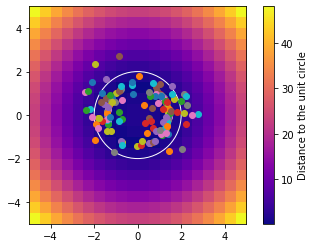

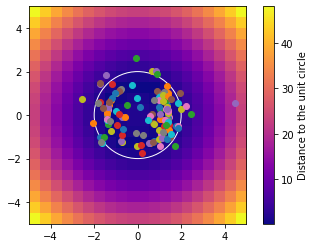

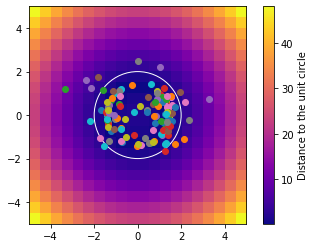

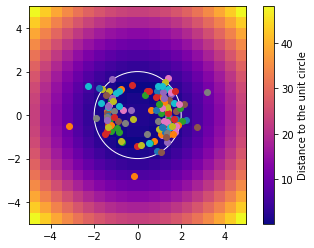

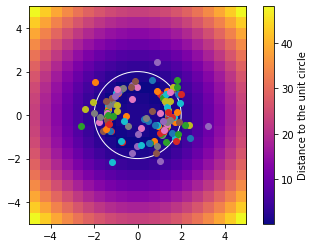

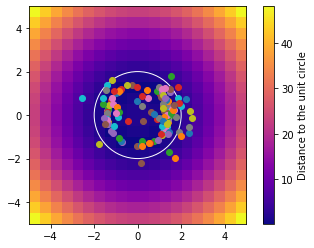

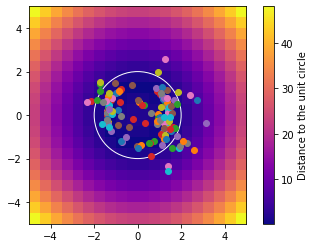

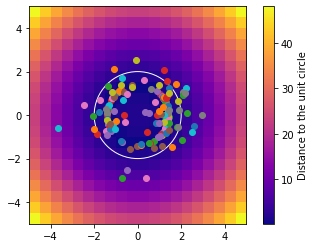

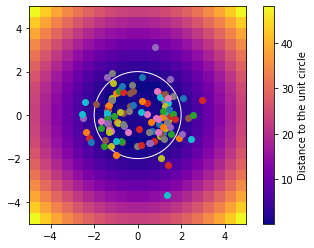

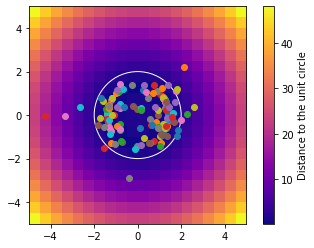

In [21]:
for n_gen, history in evolution.history.items()[0, -1]:
    plot_background()
    for individual in history:
        plt.scatter(individual[0], individual[1])
    plt.show()

# Evolution with whole-brain model

In [1]:
from neurolib.models.aln import ALNModel

In [7]:
model = ALNModel()

In [8]:
# Here we define our evaluation function. This function will
# be called reapedly and perform a single simulation. The object
# that is passed to the function, `traj`, is a pypet trajectory
# and serves as a "bridge" to load the parameter set of this 
# particular trajectory and execute a run.
# Then the power spectrum of the run is computed and its maximum
# is fitted to the target of 25 Hz peak frequency.
def evaluateSimulation(traj):
    # The trajectory id is provided as an attribute
    rid = traj.id
    logging.info("Running run id {}".format(rid))
    # this function provides the a model with the partuclar
    # parameter set for this given run
    model = evolution.getModelFromTraj(traj)
    # parameters can also be modified after loading
    model.params['dt'] = 0.1
    model.params['duration'] = 2*1000.
    # and the simulation is run
    model.run()
    
    # compute power spectrum
    frs, powers = func.getPowerSpectrum(model.rates_exc[:, -int(1000/model.params['dt']):], dt=model.params['dt'])
    # find the peak frequency
    domfr = frs[np.argmax(powers)] 
    # fitness evaluation: let's try to find a 25 Hz oscillation
    fitness = abs(domfr - 25) 
    # deap needs a fitness *tuple*!
    fitness_tuple = ()
    # more fitness values could be added
    fitness_tuple += (fitness, )
    # we need to return the fitness tuple and the outputs of the model
    return fitness_tuple, model.outputs

## Initialize and run evolution

In [10]:
# Here we define the parameters and the range in which we want
# to perform the evolutionary optimization.
# Create a `ParameterSpace` 
pars = ParameterSpace(['mue_ext_mean', 'mui_ext_mean'], [[0.0, 4.0], [0.0, 4.0]])
# Iitialize evolution with
# :evaluateSimulation: The function that returns a fitness, 
# :pars: The parameter space and its boundaries to optimize
# :model: The model that should be passed to the evaluation function
# :weightList: A list of optimization weights for the `fitness_tuple`,
#              positive values will lead to a maximization, negative 
#              values to a minimzation. The length of this list must
#              be the same as the length of the `fitness_tuple`.
# 
# :POP_INIT_SIZE: The size of the initial population that will be 
#              randomly sampled in the parameter space `pars`.
#              Should be higher than POP_SIZE. 50-200 might be a good
#              range to start experimenting with.
# :POP_SIZE: Size of the population that should evolve. Must be an
#              even number. 20-100 might be a good range to start with.
# :NGEN: Number of generations to simulate the evolution for. A good
#              range to start with might be 20-100.

weightList = [-1.0]

evolution = Evolution(evalFunction = evaluateSimulation, parameterSpace = pars, model = model, weightList = [-1.0],
                      POP_INIT_SIZE=8, POP_SIZE = 4, NGEN=2, filename="example-2.1.hdf")
# info: chose POP_INIT_SIZE=50, POP_SIZE = 20, NGEN=20 for real exploration, 
# values are lower here for testing

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/example-2.1.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
MainProcess root INFO     Evolution: Individual generation: <function randomParametersAdaptive at 0x7f9df1db9290>
MainProcess root INFO     Evolution: Mating operator: <function cxBlend at 0x7f9df1d8dc20>
MainProcess root INFO     Evolution: Mutation operator: <function gaussianAdaptiveMutation_nStepSizes at 0x7f9df1db9710>
MainProcess root INFO     Evolution: Parent selection: <function selRank at 0x7f9df1db9440>
MainProcess root INFO     Evolution: Selection operator: <function selBest_multiObj at 0x7f9df1db94d0>


In [11]:
# Enabling `verbose = True` will print statistics and generate plots 
# of the current population for each generation.
evolution.run(verbose = False)

MainProcess root INFO     Evaluating initial population of size 8 ...
MainProcess pypet.trajectory.Trajectory INFO     Your trajectory has not been explored, yet. I will call `f_explore` instead.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2022-06-22-19H-35M-44S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2022-06-22-19H-35M-44S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2022-06-22-19H-35M-44S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO    

# Analysis

### Population

In [12]:
# the current population is always accesible via
pop = evolution.pop
# we can also use the functions registered to deap
# to select the best of the population:
best_10 = evolution.toolbox.selBest(pop, k=10)
# Remember, we performed a minimization so a fitness
# of 0 is optimal
print("Best individual", best_10[0], "fitness", best_10[0].fitness)

Best individual [1.8046308871599561, 1.2657033324446174, 1.3333333333333333, 1.3333333333333333] fitness (17.0,)


We can look at the current population by calling `evolution.dfPop()` which returns a pandas dataframe with the parameters of each individual, its id, generation of birth, its outputs, and the fitness (called "f0" here).

In [13]:
evolution.dfPop(outputs=True)

,mue_ext_mean,mui_ext_mean,score,id,gen,t,rates_exc,rates_inh,IA,f0
0,1.804631,1.265703,-17.0,2,0,"[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.60...","[[14.60192173278719, 14.003888510022144, 13.43...","[[65.71225083604809, 57.96419168275399, 52.106...","[[189.72039622022888, 189.62553602211875, 189....",17.0
1,3.429063,1.830532,-24.0,0,0,"[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.60...","[[14.60192173278719, 14.003888510022144, 13.46...","[[65.71225083604809, 57.96419168275399, 52.149...","[[189.72039622022888, 189.62553602211875, 189....",24.0
2,1.780576,1.671457,-24.0,1,0,"[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.60...","[[14.60192173278719, 14.003888510022144, 13.43...","[[65.71225083604809, 57.96419168275399, 52.137...","[[189.72039622022888, 189.62553602211875, 189....",24.0
3,1.987233,3.101225,-24.0,3,0,"[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.60...","[[14.60192173278719, 14.003888510022144, 13.43...","[[65.71225083604809, 57.96419168275399, 52.245...","[[189.72039622022888, 189.62553602211875, 189....",24.0


You can also view *all individuals* that were created during the entire evolution, by calling evolution.dfEvolution():

In [14]:
evolution.dfEvolution()

,mue_ext_mean,mui_ext_mean,score,id,gen,f0
0,1.804631,1.265703,-17.0,2,0,17.0
1,3.429063,1.830532,-24.0,0,0,24.0
2,1.780576,1.671457,-24.0,1,0,24.0
3,1.987233,3.101225,-24.0,3,0,24.0
4,1.878862,0.086423,-24.0,8,1,24.0
5,3.512681,1.530617,-24.0,9,1,24.0
6,3.740196,1.358201,-24.0,10,1,24.0
7,1.938829,2.830785,-24.0,11,1,24.0


> Simulation parameters
HDF file storage: ./data/hdf/example-2.1.hdf
Trajectory Name: results-2022-06-22-19H-35M-44S
Duration of evaluating initial population 0:00:03.131703
Duration of evolution 0:00:02.396751
Model: <class 'neurolib.models.aln.model.ALNModel'>
Model name: aln
Eval function: <function evaluateSimulation at 0x7f9e3279ddd0>
Parameter space: {'mue_ext_mean': [0.0, 4.0], 'mui_ext_mean': [0.0, 4.0]}
> Evolution parameters
Number of generations: 2
Initial population size: 8
Population size: 4
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f9df1d8dc20>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f9df1db94d0>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f9df1db9440>
Comments: no comments
--- Info summary ---
Valid: 4
Mean score (weighted fitness): -2.2e+01
Parameter distribution (Generation 1):
mue_ext_mean: 	 mean: 2.2504,	 std: 0.6852
mui_ext_mean: 	 mean: 1.9672,	 std: 0.6863
---------

/Users/cc/miniconda3_x86/envs/neurolib_x86/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:238: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


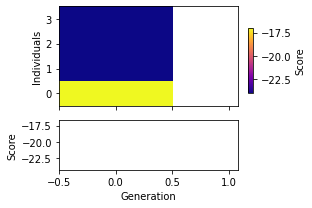

There are 4 valid individuals
Mean score across population: -2.2e+01


In [15]:
# a sinple overview of the current population (in this case the 
# last one) is given via the `info()` method. This provides a 
# a histogram of the score (= mean fitness) and scatterplots
# and density estimates across orthogonal parameter space cross 
# sections.
evolution.info(plot=True)

# Plotting genealogy tree

`neurolib` keeps track of all individuals during the evolution. You can see all individuals from each generation by calling `evolution.history`. The object `evolution.tree` provides a network description of the genealogy of the evolution: each individual (indexed by its unique `.id`) is connected to its parents. We can use this object in combination with the network library `networkx` to plot the tree:

In [16]:
# we put this into a try except block since we don't do testing on networkx
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    from networkx.drawing.nx_pydot import graphviz_layout

    G = nx.DiGraph(evolution.tree)
    G = G.reverse()     # Make the graph top-down
    pos = graphviz_layout(G, prog='dot')
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_size=50, alpha=0.5, node_color=list(evolution.id_score.values()), with_labels=False)
    plt.show()
except ImportError:
    print("It looks like networkx or pydot are not installed")
    import sys
    !{sys.executable} -m pip install networkx
    import matplotlib.pyplot as plt
    import networkx as nx
    from networkx.drawing.nx_pydot import graphviz_layout

It looks like networkx or pydot are not installed
